# Hotel Booking Analysis — Final Dashboard

This notebook presents a consolidated analytical dashboard summarizing key business insights from the hotel booking dataset.


In [2]:
#Load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/python_cleaned/hotel_bookings_features.csv", parse_dates=["arrival_date"])
df.shape



(87486, 41)

Create KPI Metrics (Top Summary)

In [4]:
total_bookings=len(df)

cancel_rate=df['is_canceled'].mean()*100

total_revenue=df['revenue'].sum()

avg_adr=df['adr'].mean()

total_bookings,cancel_rate,total_revenue,avg_adr

(87486,
 np.float64(27.463822783073866),
 np.float64(23002559.9),
 np.float64(106.29261893331505))

## 📌 Key Business KPIs

- Total Bookings: **87486**
- Cancellation Rate: *27.46%**
- Total Revenue: **$23002559.9**
- Average Daily Rate (ADR): **$106.29**


Dashboard Figure (4–6 Plots)

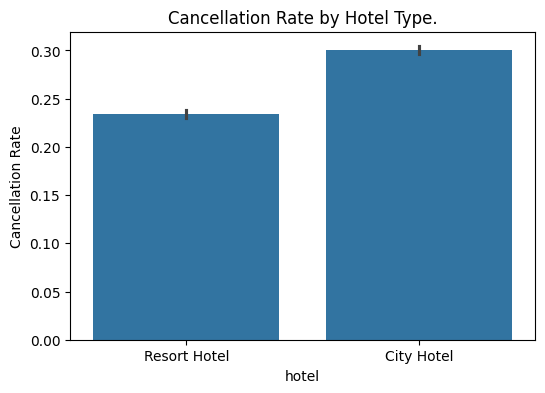

In [6]:
#1️⃣ Cancellation by Hotel Type

plt.figure(figsize=(6,4))
sns.barplot(x='hotel',y='is_canceled',data=df,estimator=lambda x: sum(x)/len(x))
plt.title("Cancellation Rate by Hotel Type.")
plt.ylabel("Cancellation Rate")
plt.show()

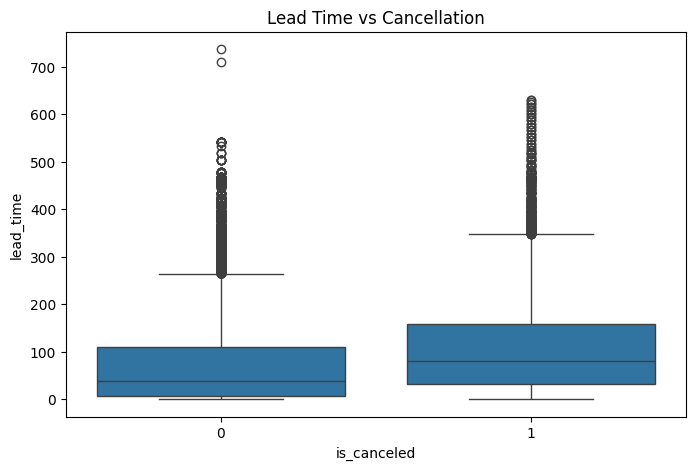

In [ ]:
#2️⃣ Lead Time vs Cancellation

plt.figure(figsize=(8,5))
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time vs Cancellation")
plt.show()


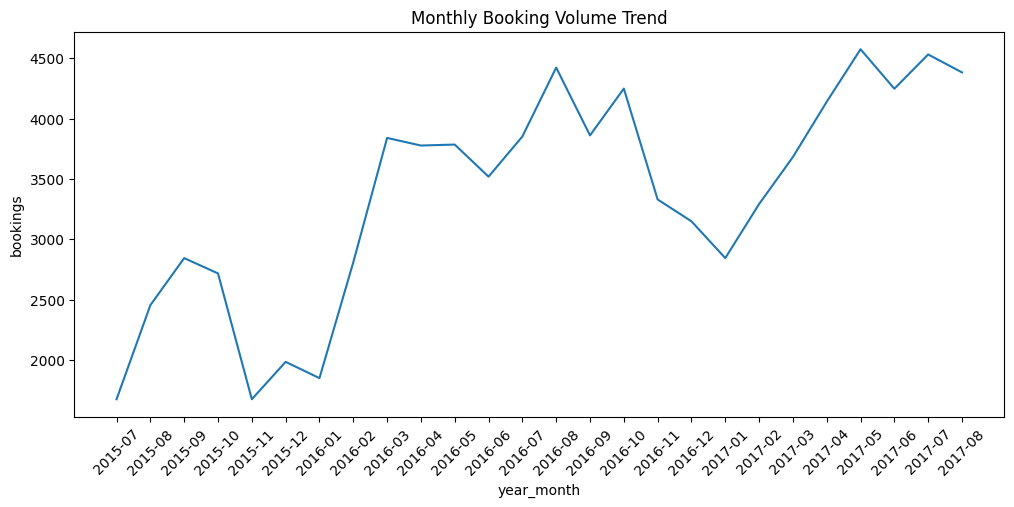

In [8]:
#3️⃣ Monthly Booking Trend
df["year_month"] = df["arrival_date"].dt.to_period("M").astype(str)
monthly_bookings = df.groupby("year_month").size().reset_index(name="bookings")

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_bookings, x="year_month", y="bookings")
plt.xticks(rotation=45)
plt.title("Monthly Booking Volume Trend")
plt.show()



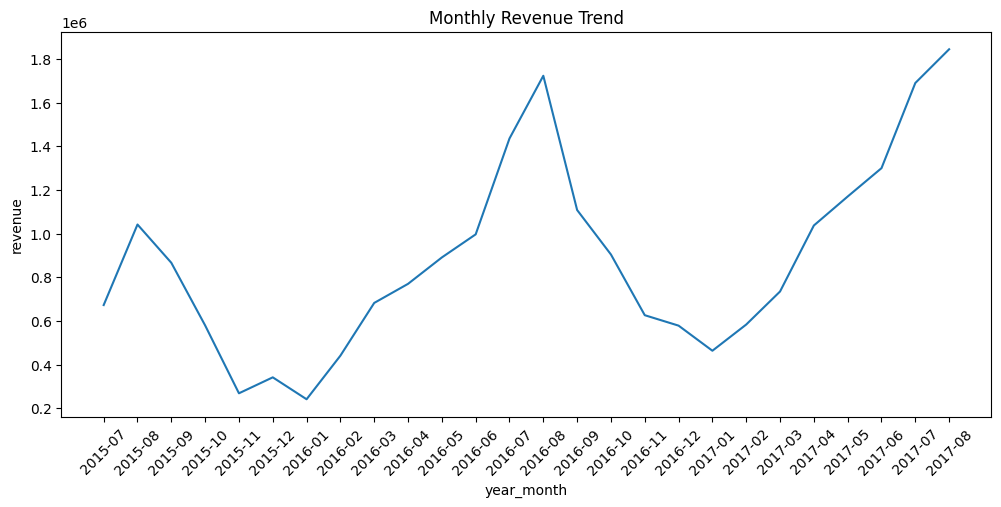

In [9]:
#4️⃣ Monthly Revenue Trend
monthly_revenue = df.groupby("year_month")["revenue"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x="year_month", y="revenue")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()


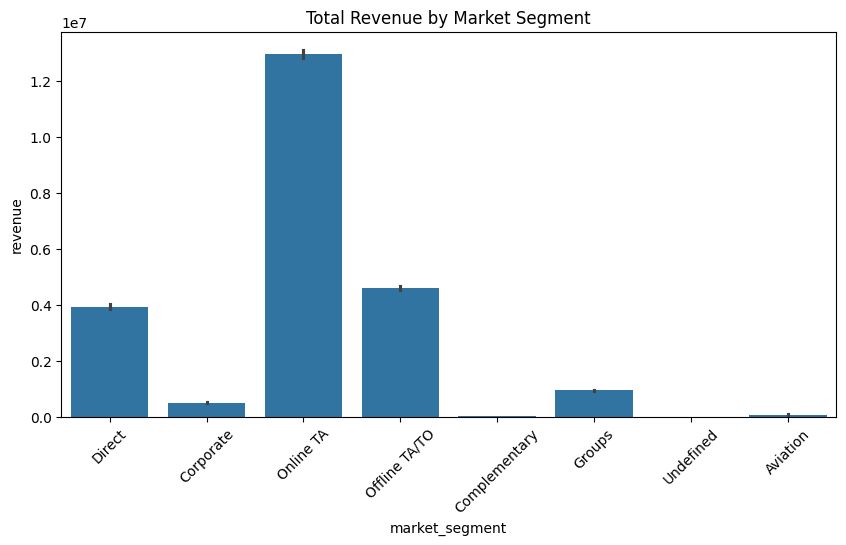

In [10]:
#5️⃣ Revenue by Market Segment
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="market_segment", y="revenue", estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Revenue by Market Segment")
plt.show()


## 🧠 Executive Summary

- The business has a **~27% cancellation rate**, which represents a significant revenue risk.
- **Lead time is the strongest driver of cancellations**, indicating early bookings are more volatile.
- **City Hotels** show higher cancellation volatility compared to Resort Hotels.
- Revenue is **highly concentrated in a few market segments**, especially travel agent channels.
- These high-revenue channels also carry **high cancellation risk**, making them the top priority for policy and pricing optimization.
- Strong **seasonality patterns** exist in both bookings and cancellations, especially for City Hotels.
